# Global Power Plant Database Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('Global Power Plant Database.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(908, 25)

In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [7]:
#lets check null values
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [8]:
data.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", 
        "estimated_generation_gwh"], axis=1, inplace=True)

As per above there are many missing values. So we need to drop them as they are not going impact. 

In [9]:
data.shape

(908, 13)

In [10]:
data.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
source,191


In [11]:
data.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [12]:
data.shape

(908, 7)

In [13]:
data.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [14]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,908.000000,862.000000,862.000000,528.000000
mean,321.046378,21.196189,77.447848,1996.876894
std,580.221767,6.248627,4.907260,17.047817
min,0.000000,8.168900,68.644700,1927.000000
25%,16.837500,16.771575,74.258975,1988.000000
50%,60.000000,21.778300,76.719250,2000.000000
75%,388.125000,25.516375,79.441475,2011.250000
max,4760.000000,34.649000,95.408000,2018.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         908 non-null    float64
 1   latitude            862 non-null    float64
 2   longitude           862 non-null    float64
 3   primary_fuel        908 non-null    object 
 4   commissioning_year  528 non-null    float64
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.8+ KB


In [17]:
#Lets check the which columns are object and which one is float columns.

object_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Columns: ", object_datatype)

Object Columns:  ['primary_fuel', 'source', 'geolocation_source']


In [18]:
float_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Columns: ", float_datatype)        

Float Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [19]:
data["latitude"].fillna(data["latitude"].mean(),inplace=True)
data["longitude"].fillna(data["longitude"].mean(),inplace=True)

In [20]:
data["commissioning_year"].fillna(data["commissioning_year"].mode()[0],inplace=True)
data["geolocation_source"].fillna(data["geolocation_source"].mode()[0],inplace=True)

In [21]:
data.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [22]:
for col in object_datatype:
    print(col)
    print(data[col].value_counts())
    print("="*120)

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
ACME Cleantech Solutions Private Limited       1
SEI Solar Energy Private Limited               1
Gem Sugars ltd                                 1
Mula Ssk ltd                                   1
Est vt Arind                                   1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


# Visualization

In [23]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

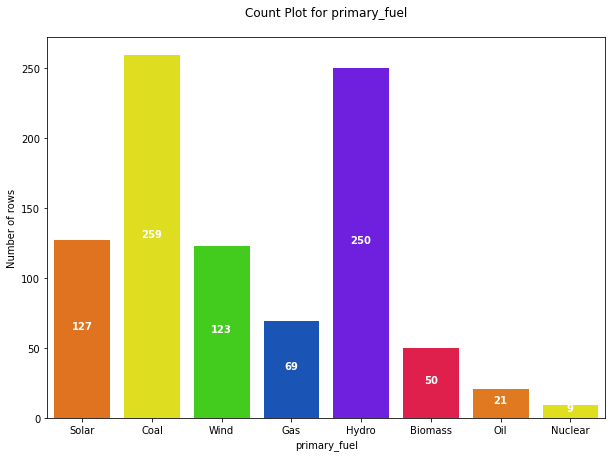

In [25]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = data[col_name].value_counts()
    index = 0
    ax = sns.countplot(data[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

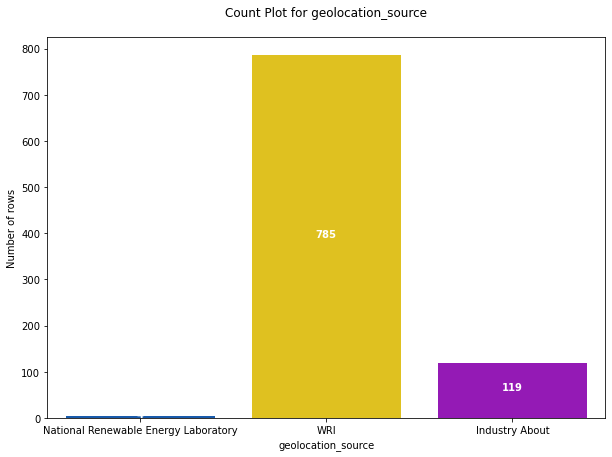

In [26]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = data[col_name].value_counts()
    index = 0
    ax = sns.countplot(data[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pas

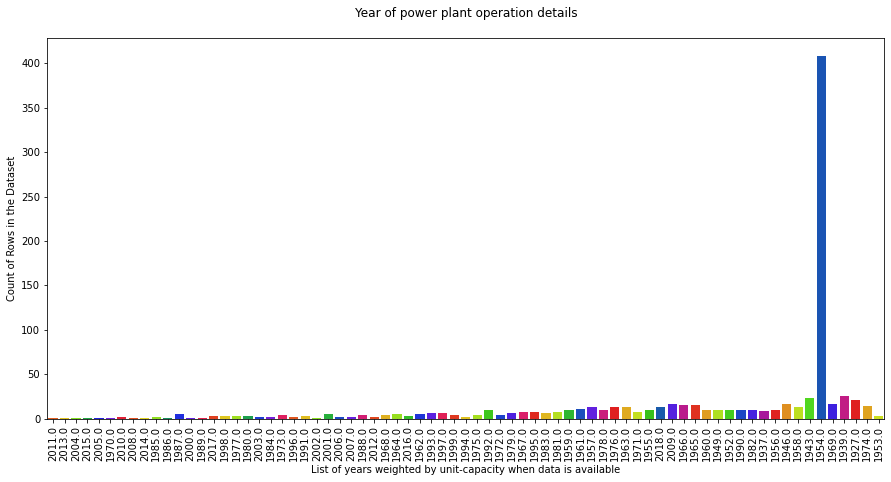

In [28]:
plt.figure(figsize=(15,7))
values = list(data['commissioning_year'].unique())
diag = sns.countplot(data["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

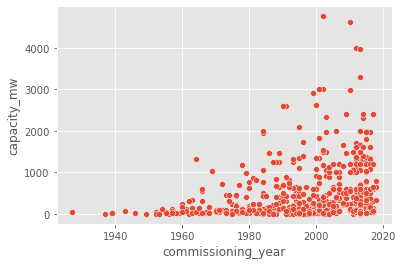

In [34]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = data)
plt.show()

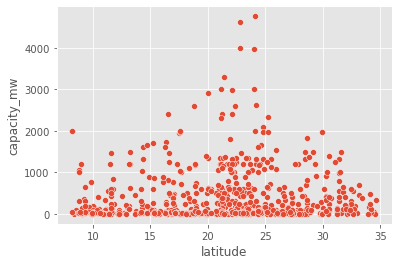

In [35]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = data)
plt.show()

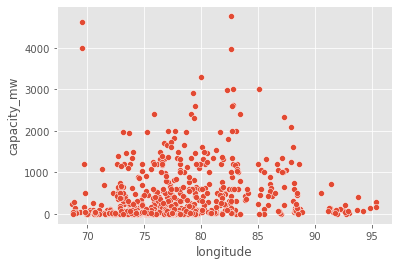

In [36]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = data)
plt.show()

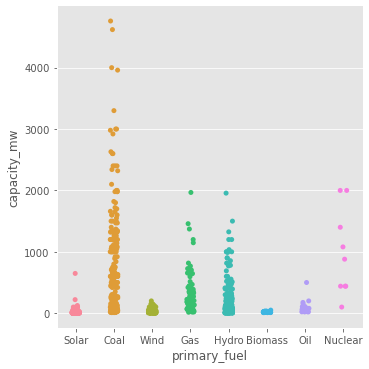

In [37]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

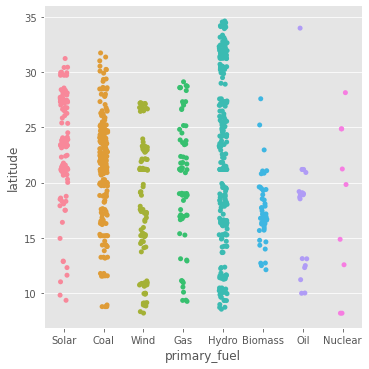

In [38]:
sns.catplot(x = "primary_fuel", y = "latitude", data = data)
plt.show()

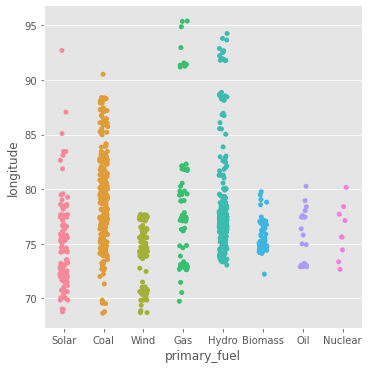

In [39]:
sns.catplot(x = "primary_fuel", y = "longitude", data = data)
plt.show()

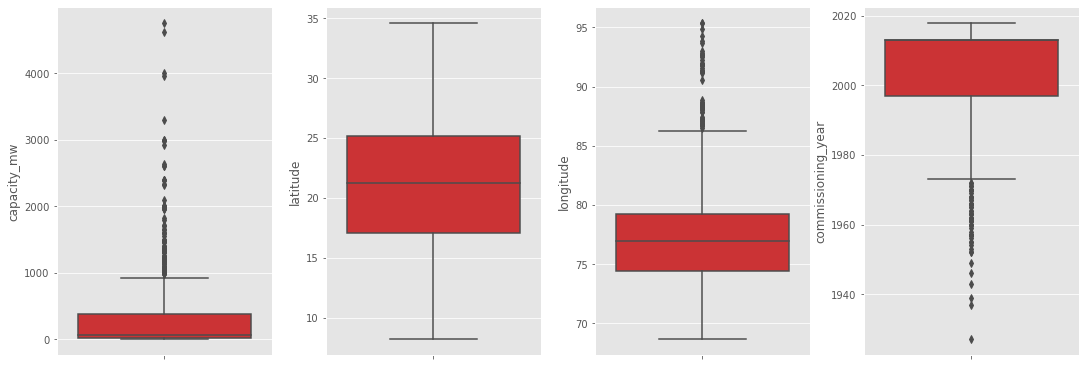

In [41]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in data[float_datatype].items():
    sns.boxplot(y=col, data=data, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

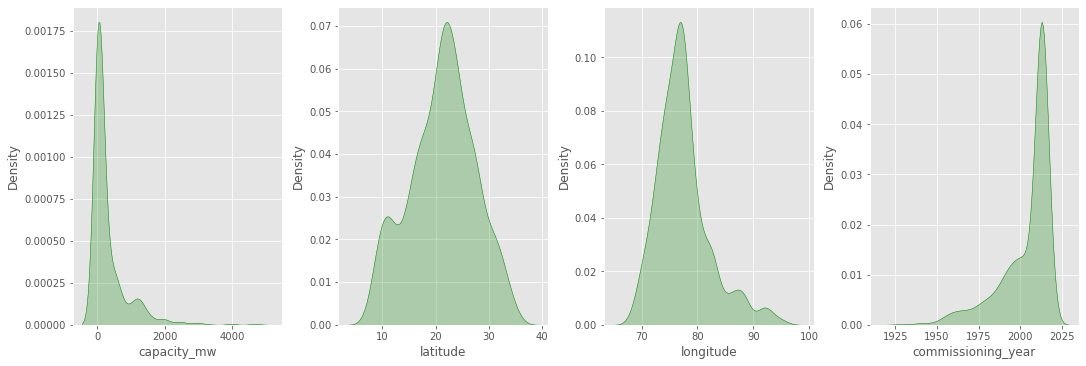

In [42]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in data[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

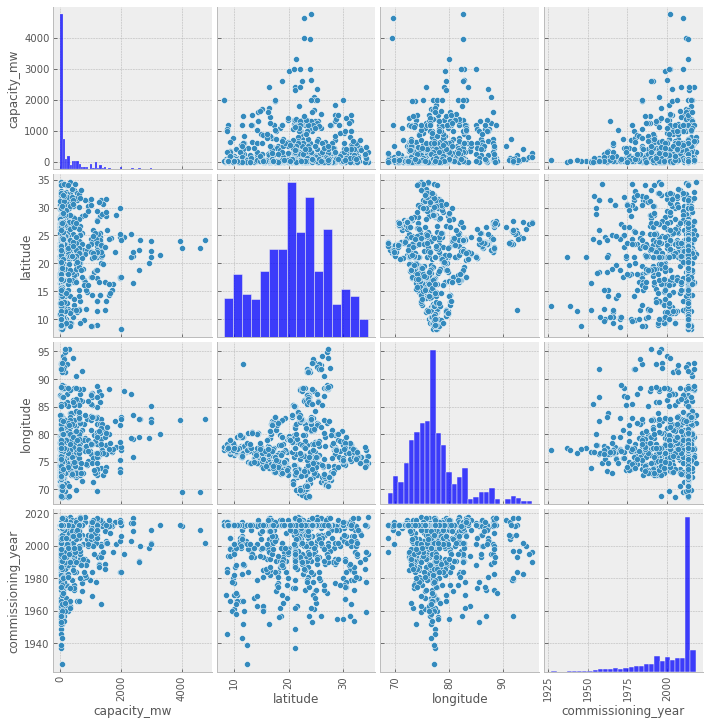

In [43]:
plt.style.use('bmh')
g = sns.pairplot(data)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

In [46]:
oe = OrdinalEncoder()
data['geolocation_source'] = oe.fit_transform(data['geolocation_source'].values.reshape(-1,1))
data['source'] = oe.fit_transform(data['source'].values.reshape(-1,1))
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,Coal,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,Wind,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,Gas,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,Coal,2015.0,22.0,2.0


In [49]:
le = LabelEncoder()
data["primary_fuel"] = le.fit_transform(data["primary_fuel"])
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


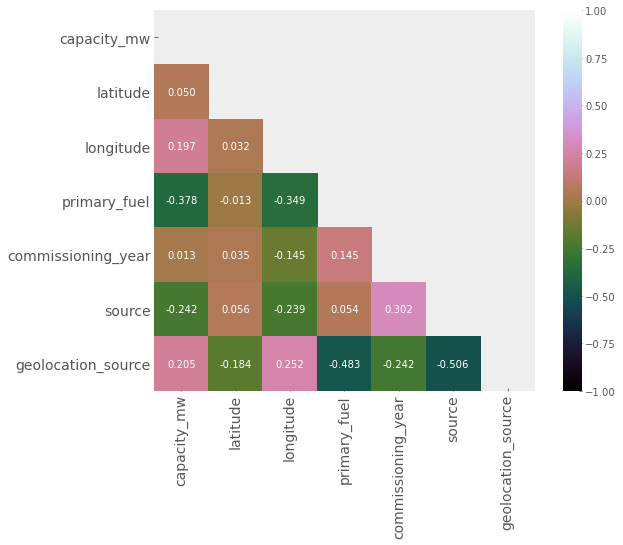

In [50]:
upper_triangle = np.triu(data.corr())
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

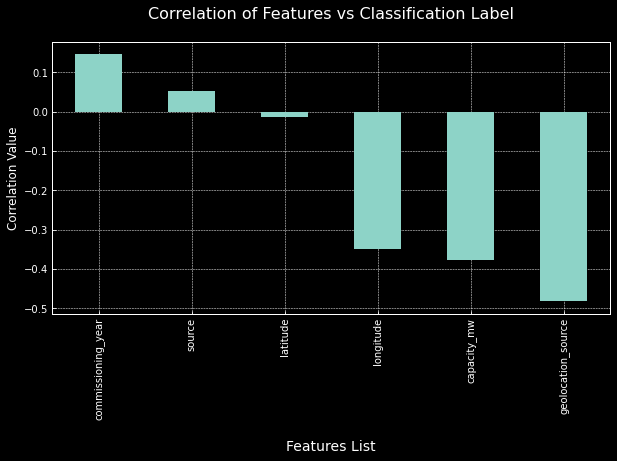

In [51]:
plt.style.use('dark_background')
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

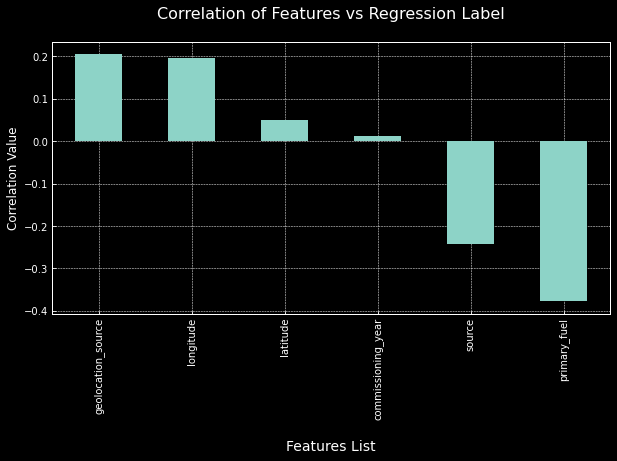

In [52]:
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [53]:
#Lets use Z Score to remove outliers

z = np.abs(zscore(data))
threshold = 3
data1 = data[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", data.shape)
print ("Shape of the dataframe after removing outliers: ", data1.shape)
print ("Percentage of data loss post outlier removal: ", (data.shape[0]-data1.shape[0])/data.shape[0]*100)

data=data1.copy() 

Shape of the dataframe before removing outliers:  (908, 7)
Shape of the dataframe after removing outliers:  (839, 7)
Percentage of data loss post outlier removal:  7.599118942731277


In [54]:
data.skew()

capacity_mw           1.964097
latitude             -0.109264
longitude             0.846704
primary_fuel          0.419942
commissioning_year   -1.578180
source                1.794155
geolocation_source   -2.114267
dtype: float64

In [55]:
#lets use Log Transform to fix skewness

for col in float_datatype:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

# Splitting the dataset

In [56]:
X = data.drop('primary_fuel', axis=1)
Y = data['primary_fuel']

In [57]:
Y.value_counts()

1    237
3    219
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

In [58]:
## adding samples to make all the categorical label values same
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [59]:
Y.value_counts()

7    237
6    237
5    237
4    237
3    237
2    237
1    237
0    237
Name: primary_fuel, dtype: int64

In [60]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.735094,1.440318,-0.879176,0.514679,1.344324,-1.205563
1,0.177892,0.848286,-0.480798,0.685263,2.780693,0.365850
2,-0.337937,0.352414,-2.046205,0.685263,-0.600298,0.365850
3,0.359632,0.693227,3.884565,-0.082363,-0.578200,0.365850
4,1.838255,0.362201,1.660911,0.855846,-0.578200,0.365850


In [61]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 73.20675105485233 on Random State 165


In [62]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)


In [63]:

# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        60
           1       0.58      0.53      0.55        55
           2       0.56      0.34      0.42        44
           3       0.58      0.54      0.56        71
           4       0.74      0.88      0.80        72
           5       0.52      0.48      0.50        60
           6       1.00      0.98      0.99        59
           7       0.79      1.00      0.88        53

    accuracy                           0.70       474
   macro avg       0.69      0.69      0.68       474
weighted avg       0.69      0.70      0.69       474

Accuracy Score: 70.25316455696202
Cross Validation Score: 67.40536036661575

Accuracy Score - Cross Validation Score is 2.8478041903462668


In [64]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83        60
           1       0.62      0.58      0.60        55
           2       0.70      0.52      0.60        44
           3       0.84      0.68      0.75        71
           4       0.75      1.00      0.86        72
           5       0.76      0.73      0.75        60
           6       1.00      0.98      0.99        59
           7       0.77      1.00      0.87        53

    accuracy                           0.79       474
   macro avg       0.79      0.78      0.78       474
weighted avg       0.80      0.79      0.79       474

Accuracy Score: 79.32489451476793
Cross Validation Score: 80.16900430495764

Accuracy Score - Cross Validation Score is -0.8441097901897052


In [65]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.60      0.47      0.53        55
           2       0.58      0.82      0.68        44
           3       0.78      0.69      0.73        71
           4       0.92      0.90      0.91        72
           5       0.78      0.83      0.81        60
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        53

    accuracy                           0.83       474
   macro avg       0.82      0.83      0.82       474
weighted avg       0.83      0.83      0.83       474

Accuracy Score: 82.91139240506328
Cross Validation Score: 85.49743091237329

Accuracy Score - Cross Validation Score is -2.5860385073100076


In [67]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.75      0.71      0.73        55
           2       0.86      0.86      0.86        44
           3       0.89      0.83      0.86        71
           4       0.92      1.00      0.96        72
           5       0.92      0.98      0.95        60
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.92       474
   macro avg       0.91      0.91      0.91       474
weighted avg       0.91      0.92      0.91       474

Accuracy Score: 91.56118143459916
Cross Validation Score: 90.50687404527149

Accuracy Score - Cross Validation Score is 1.0543073893276755


In [68]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        60
           1       0.76      0.45      0.57        55
           2       0.68      0.77      0.72        44
           3       0.86      0.61      0.71        71
           4       0.74      0.96      0.84        72
           5       0.83      0.82      0.82        60
           6       0.95      1.00      0.98        59
           7       0.74      1.00      0.85        53

    accuracy                           0.81       474
   macro avg       0.81      0.81      0.80       474
weighted avg       0.82      0.81      0.80       474

Accuracy Score: 80.80168776371308
Cross Validation Score: 81.17205943618941

Accuracy Score - Cross Validation Score is -0.3703716724763382


In [69]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        60
           1       0.76      0.67      0.71        55
           2       0.85      0.80      0.82        44
           3       0.89      0.87      0.88        71
           4       0.87      0.99      0.92        72
           5       0.95      0.97      0.96        60
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99        53

    accuracy                           0.91       474
   macro avg       0.91      0.90      0.90       474
weighted avg       0.91      0.91      0.91       474

Accuracy Score: 90.71729957805907
Cross Validation Score: 91.24468823774474

Accuracy Score - Cross Validation Score is -0.5273886596856698
